In [1]:
RANDOM_SEED = 1

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# initial work with the smaller data set
bank = pd.read_csv('bank.csv', sep = ';')  # start with smaller data set

# Exploring the Data

In [2]:
#Look at the shape of the data set, rows and columns
bank.shape

(4521, 17)

In [3]:
#Do we have any null values in our dataset
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [4]:
#Snapshot of our dataset
pd.concat([bank.head(),bank.tail()])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
#We need to convert our explanatory and response variables to binary values because it is a yes or no
binary_vals = {'no': 0, 'yes': 1}
bank_default_map = bank['default'].map(binary_vals)
bank_housing_map = bank['housing'].map(binary_vals)
bank_loan_map = bank['loan'].map(binary_vals)
bank_response_map = bank['response'].map(binary_vals)

In [6]:
#creating our new data after conversion
default_housing_loan_data = np.array([np.array(bank_default_map), np.array(bank_housing_map), 
                                      np.array(bank_loan_map), np.array(bank_response_map)]).T

In [7]:
#Putting the data in a dataframe
default_housing_loan_data_df = pd.DataFrame(default_housing_loan_data, 
                                            columns = ['default', 'housing', 'loan', 'response'])

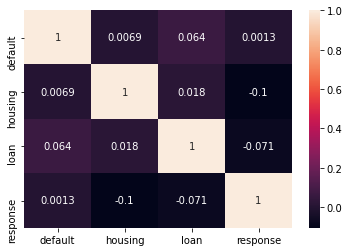

In [8]:
#Is there any sort of correlation
sns.heatmap(default_housing_loan_data_df.corr(),annot=True)

# Training the Classification Models

In [9]:
#Split our data set in to train and test
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold

X_train, X_test, y_train, y_test = train_test_split(default_housing_loan_data_df[['default', 'housing', 'loan']],
                                                   default_housing_loan_data_df.response, test_size=0.4, 
                                                   random_state=RANDOM_SEED, shuffle = True)

In [10]:
#functions that use predict_proba and decision_function
def classify_predict_proba(model,X_train, X_test, y_train):
    model.fit(X_train, y_train)
    y_predict = model.predict_proba(X_test)
    return y_predict[:,1]

def classify_decision_function(model,X_train, X_test, y_train):
    model.fit(X_train, y_train)
    y_predict = model.decision_function(X_test)
    return y_predict

In [11]:
#Using our Naive Bayes and Logisitic Regression Model
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix 
lr = LogisticRegression()
nb = BernoulliNB()

#AUC scores for both models
print("LogisticRegression AUC for predict_proba: ",
      roc_auc_score(y_test,classify_predict_proba(lr,X_train, X_test, y_train)))
print("LogisticRegression AUC for decision_function: ",
      roc_auc_score(y_test,classify_decision_function(lr,X_train, X_test, y_train)))
print("Naive Bayes AUC for predict_proba: ",
      roc_auc_score(y_test,classify_predict_proba(nb,X_train, X_test, y_train)))

LogisticRegression AUC for predict_proba:  0.6159758347223128
LogisticRegression AUC for decision_function:  0.6159758347223128
Naive Bayes AUC for predict_proba:  0.6159758347223128


In [15]:
#Using cross-validation to get multiple auc scores for different folds
from sklearn.model_selection import cross_val_score, cross_val_predict
y_cvs = cross_val_score(lr , X_train , y_train , cv = 10 , scoring = "roc_auc" ) 
print('LogisticRegression cross-validation roc_auc_scores: ', y_cvs)
print('\nLogisticRegression cross-validation roc_auc_scores mean: ',y_cvs.mean())

LogisticRegression cross-validation roc_auc_scores:  [0.66182573 0.62735912 0.5811828  0.56646505 0.59556452 0.57862903
 0.61975806 0.57452957 0.50846774 0.67782258]

LogisticRegression cross-validation roc_auc_scores mean:  0.5991604202917948


In [16]:
#Running the same cross-validation score but with Naive Bayes
y_cvs = cross_val_score(nb , X_train , y_train , cv = 10 , scoring = "roc_auc" ) 
print('NaiveBayes cross-validation roc_auc_scores: ', y_cvs)
print('\nNaiveBayes cross-validation roc_auc_scores mean: ',y_cvs.mean())

NaiveBayes cross-validation roc_auc_scores:  [0.66182573 0.62695757 0.5811828  0.56444892 0.59784946 0.57862903
 0.61814516 0.57452957 0.50846774 0.67526882]

NaiveBayes cross-validation roc_auc_scores mean:  0.5987304800785258


Text(0, 0.5, 'True Positive Rate')

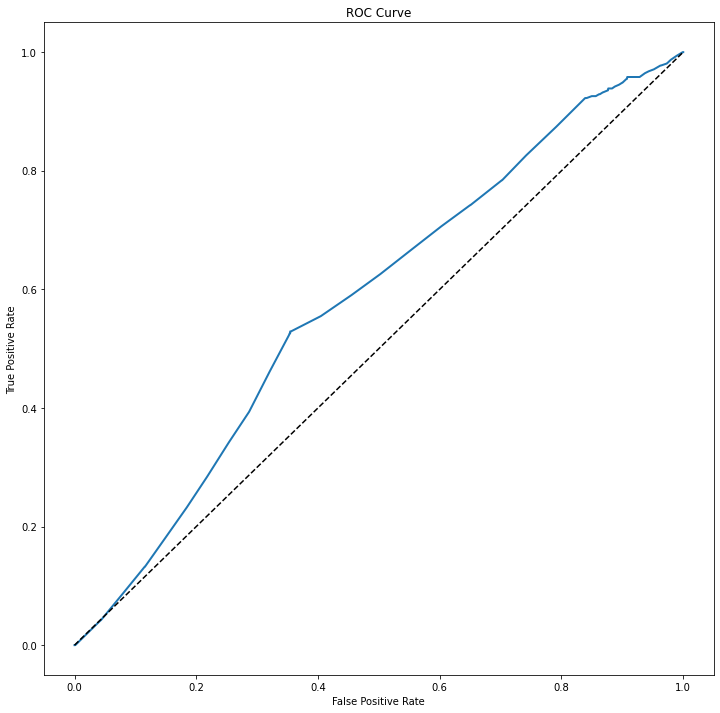

In [19]:
#Plotting our ROC curve for Logistic Regression
import matplotlib.pyplot as plt
y_cvp = cross_val_predict(lr , X_train , y_train , cv = 10 , method = "predict_proba" ) 
fpr , tpr , thresholds = roc_curve ( y_train , y_cvp[:,1] ) 
plt.plot(fpr,tpr,linewidth = 2)
plt.plot([0,1],[0,1],'k--')
plt.rcParams['figure.figsize'] = [12, 12]
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'True Positive Rate')

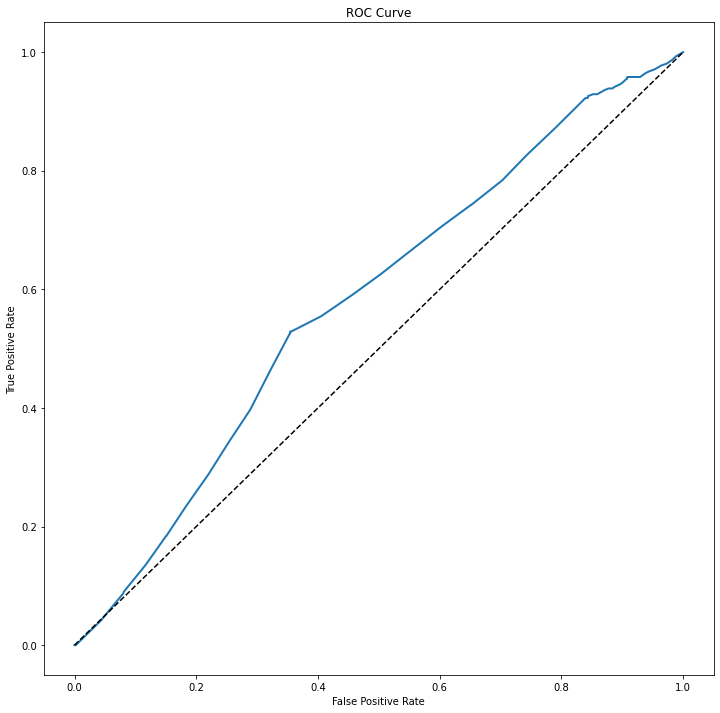

In [18]:
#Plotting our ROC curve for Naive Bayes
y_cvp = cross_val_predict(nb , X_train , y_train , cv = 10 , method = "predict_proba" ) 
fpr , tpr , thresholds = roc_curve ( y_train , y_cvp[:,1] ) 
plt.plot(fpr,tpr,linewidth = 2)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')